In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# ax - wykres
# x1 - początek m/z
# x2 - koniec m/z
# ymin - minimalna intensywność opisywanych pików
# ymax - maksymalna intensywność opisywanych pików
# dataset - macierz z widmem załadowanym z pliku
# fsize - font size

def labels(ax, x1, x2, ymin, ymax, dataset, fsize):   
    last_x = 0
    last_y = 0
    for p in dataset:
        x = p[0]
        y = p[1]
        if x<x2 and x>x1 and y > ymin:
            label = r'{:.2f}'.format(x)
            if y >= ymax:
                ax.text(x+2, ymax-0.13*ymax, label, rotation='vertical', ha='left',size=fsize)
            elif x - 7 < last_x:
                ax.text(x+2, y, label, rotation='vertical', ha='left',size=fsize)
            else:
                ax.text(x-2, y, label, rotation='vertical', ha='right', size=fsize)
            last_x = x
            last_y = y

            
            
# przeliczenie sygnału na wartości względne od 0 do 1
def normalize(a):
    maxy = a[:,1].max()
    a[:,1] = a[:,1] / maxy

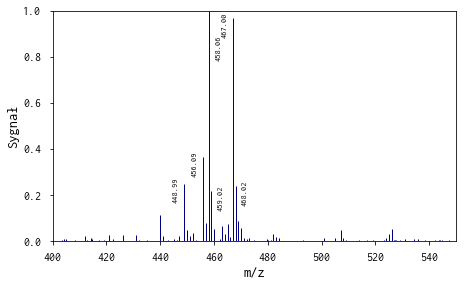

In [8]:
# załadowanie widma
in9 = np.loadtxt('IN9.txt')
# normalizacja sygnału do zakresu 0 - 1
normalize(in9)

#zakres m/z
x1 = 400
x2 = 550
#zakres sygnału (znormalizowanego)
y1 = 0
y2 = 1

# rozmiar rys. w calach
fig = plt.figure(figsize=(7,4))
# x0, y0, szer, wys. wykresu
ax1 = fig.add_axes([0.15,0.15,0.8,0.8])

# zakres m/z
ax1.set_xlim([x1,x2])

# zakres sygnału
ax1.set_ylim([y1,y2])

ax1.vlines(in9[:,0], 0, in9[:,1], 
           '#000080',     # kolor rrggbb
           linewidth=1    # grubość linii
          )

ax1.set_xlabel('m/z')
ax1.set_ylabel(u'Sygnał')




# podpisanie widma

# zakres sygnałów do podpisania:
smin = 0.2
smax = 1
# np. dla smin=0.2 smax=1 => oznacza podpisanie wszystkich pików  o intensywności 0.2 < s < 1 

# wielkość fontów: xx-small, x-small, small, itd
labels(ax1, x1, x2, smin, smax, in9, 'small')



# export do pliku

# plik SVG można dalej obrabiać ...
plt.savefig('widmo.svg')